<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Traitar-inferred-phenotypes" data-toc-modified-id="Traitar-inferred-phenotypes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Traitar inferred phenotypes</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Summary:-majority-votes" data-toc-modified-id="Summary:-majority-votes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary: majority votes</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Checks</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-6.1.0.1"><span class="toc-item-num">6.1.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li><li><span><a href="#Trait-distribution" data-toc-modified-id="Trait-distribution-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Trait distribution</a></span></li></ul></li><li><span><a href="#Summary:-single-votes" data-toc-modified-id="Summary:-single-votes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary: single votes</a></span><ul class="toc-item"><li><span><a href="#Trait-distribution" data-toc-modified-id="Trait-distribution-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Trait distribution</a></span></li></ul></li><li><span><a href="#Dist-of-phenotypes" data-toc-modified-id="Dist-of-phenotypes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dist of phenotypes</a></span><ul class="toc-item"><li><span><a href="#Majority-votes" data-toc-modified-id="Majority-votes-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Majority votes</a></span><ul class="toc-item"><li><span><a href="#Renaming" data-toc-modified-id="Renaming-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Renaming</a></span></li></ul></li><li><span><a href="#Single-votes" data-toc-modified-id="Single-votes-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Single votes</a></span><ul class="toc-item"><li><span><a href="#Renaming" data-toc-modified-id="Renaming-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Renaming</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Create a tree (dendrogram) of traitar-inferred phenotypes among the GTDB genomes

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/'

# GTDBr89 metadata
meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# params
threads = 8

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(LeyLabRMisc)

In [4]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/ 


# Traitar inferred phenotypes

* Using traitar (updated to python3; "traitar3") implemeneted in the `LLG` snakemake pipeline

In [5]:
# config
cat_file(file.path(work_dir, 'config.yaml'))

# table with genome --> fasta_file information
samples_file: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/samples.txt

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# batch processing of genomes for certain steps
## increase to better parallelize
batches: 100

# software parameters
# Use "Skip" to skip any of these steps. If no params for rule, use ""
# dRep MAGs are not further analyzed, but you can de-rep & then use the de-rep genome table as input.
params:
  # assembly assessment
  seqkit: ""
  quast: Skip #""
  multiqc_on_quast: Skip #"" 
  checkm: Skip #""
  # de-replication (requires checkm)
  drep: Skip #-comp 50 -con 5 -sa 0.95
  # taxonomy
  sourmash:
    compute: Skip #--scaled 10000 -k 31
    gather: -k 31
  gtdbtk:
    classify_wf: Skip #--min_perc_aa 10
  # pairwise ANI
  fastani: S

**Pipeline run**

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/llg
$ screen -L -S llg-traitar-GTDB ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/config.yaml 100 
```

# Load

In [30]:
# samples file for LLG run
F = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/samples.txt'
samps = Fread(F)
samps

Name,Fasta
<chr>,<chr>
GCA_002287175.1,/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/genbank/archaea/GCA_002287175.1/GCA_002287175.1_ASM228717v1_genomic.fna.gz
GCA_000302455.1,/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/genbank/archaea/GCA_000302455.1/GCA_000302455.1_ASM30245v1_genomic.fna.gz
⋮,⋮
GCA_002688505.1,/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/genbank/bacteria/GCA_002688505.1/GCA_002688505.1_ASM268850v1_genomic.fna.gz
GCA_003234965.1,/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/genbank/bacteria/GCA_003234965.1/GCA_003234965.1_ASM323496v1_genomic.fna.gz


In [31]:
# metadata
meta = Fread(meta_file) %>%
    select.(ncbi_genbank_assembly_accession, ncbi_organism_name, gtdb_taxonomy, accession) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, taxonomy_levels(), sep=';')
meta %>% unique_n('accessions', ncbi_genbank_assembly_accession)
meta

No. of unique accessions: 23360 


ncbi_genbank_assembly_accession,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,GB_GCA_001775395.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806 sp001775395
GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [32]:
# checking overlap
overlap(meta, samps, ncbi_genbank_assembly_accession, Name)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


# Summary: majority votes

In [33]:
F = file.path(work_dir, 'phenotype', 'predictions_flat_majority-votes_combined.tsv.gz')
trt_maj_votes = Fread(F) 
trt_maj_votes

sample,phenotype,prediction,phenotype_model
<chr>,<chr>,<int>,<chr>
GCA_002287175.1,Gram positive,1,phypat
GCA_002287175.1,Growth on ordinary blood agar,1,phypat
⋮,⋮,⋮,⋮
GCA_003234965.1,Yellow pigment,0,phypat
GCA_003234965.1,Yellow pigment,0,phypat+PGL


## Checks

In [34]:
# checking overlap of genome metadata & phenotype data
overlap(trt_maj_votes, meta, sample, ncbi_genbank_assembly_accession)

intersect(x,y): 22837 
setdiff(x,y): 0 
setdiff(y,x): 523 
union(x,y): 23360 


#### Notes

* Some genomes missing from phenotype table due to no phenotypes identified

In [35]:
# joining with metadata
trt_maj_votes = trt_maj_votes %>%
    right_join.(meta %>% rename.('sample' = ncbi_genbank_assembly_accession), 
                by=c('sample')) 
trt_maj_votes %>% unique_n('genomes', sample)
trt_maj_votes

No. of unique genomes: 23360 


sample,phenotype,prediction,phenotype_model,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,NA,NA,NA,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_001784635.1,NA,NA,NA,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10 sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_002791595.1,Yellow pigment,0,phypat,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595
GCA_002791595.1,Yellow pigment,0,phypat+PGL,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [36]:
# genomes lacking phenotypes
trt_maj_votes %>% filter.(is.na(phenotype)) %>% pull.(phenotype) %>% length

df.dims(40)
trt_maj_votes %>%
    filter.(is.na(phenotype)) %>%
    summarize.(N=n.(), 
               .by=c(Domain, Phylum, Class)) %>%
    arrange.(Domain, Phylum, Class)
df.dims()

[1] 523

Domain,Phylum,Class,N
<chr>,<chr>,<chr>,<int>
d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,3
d__Archaea,p__Crenarchaeota,c__Bathyarchaeia,4
d__Archaea,p__Crenarchaeota,c__Nitrososphaeria,5
d__Archaea,p__Crenarchaeota,c__Thermoprotei,2
d__Archaea,p__EX4484-52,c__EX4484-52,1
d__Archaea,p__Hadarchaeota,c__Hadarchaeia,1
d__Archaea,p__Huberarchaeaota,c__Huberarchaeia,1
d__Archaea,p__Iainarchaeota,c__Iainarchaeia,3
d__Archaea,p__Micrarchaeota,c__Micrarchaeia,3


## Trait distribution

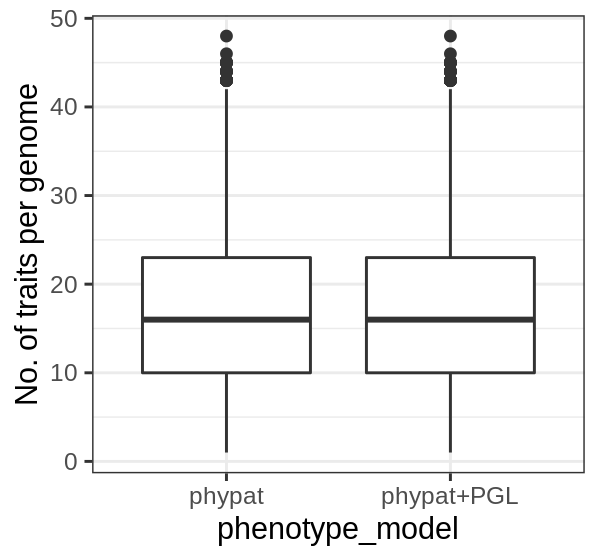

In [37]:
trt_maj_votes_s = trt_maj_votes %>%
    filter.(!is.na(phenotype)) %>%
    summarize.(n_traits = sum(prediction),
               .by=c(sample, phenotype_model))

p = trt_maj_votes_s %>%
    ggplot(aes(phenotype_model, n_traits)) +
    geom_boxplot() +
    labs(y='No. of traits per genome') +
    theme_bw()
p.dims(3,2.8)
plot(p)

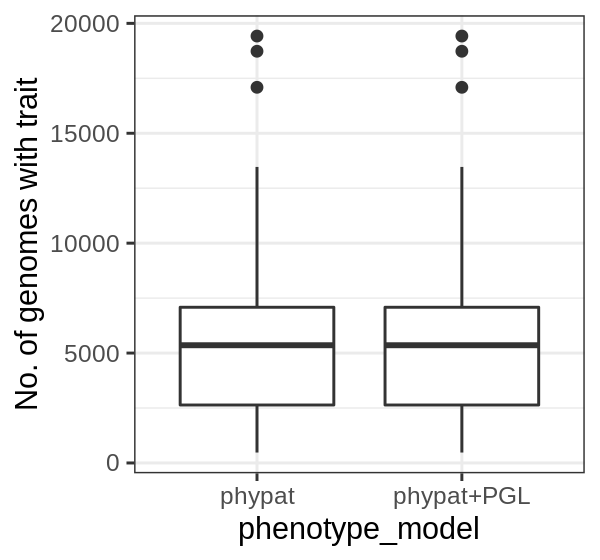

In [38]:
total_genomes = trt_maj_votes %>% pull.(sample) %>% unique %>% length

trt_maj_votes_s = trt_maj_votes %>%
    filter.(!is.na(phenotype)) %>%
    summarize.(n_genomes = sum(prediction),
               perc_genomes = sum(prediction) / total_genomes * 100,
               .by=c(phenotype, phenotype_model)) 

p = trt_maj_votes_s %>%
    ggplot(aes(phenotype_model, n_genomes)) +
    geom_boxplot() +
    labs(y='No. of genomes with trait') +
    theme_bw()
p.dims(3,2.8)
plot(p)

File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/01_data_explore/.figures/a8291eb7e93bb6ca4ed64f8d4b1e0175.RDS 


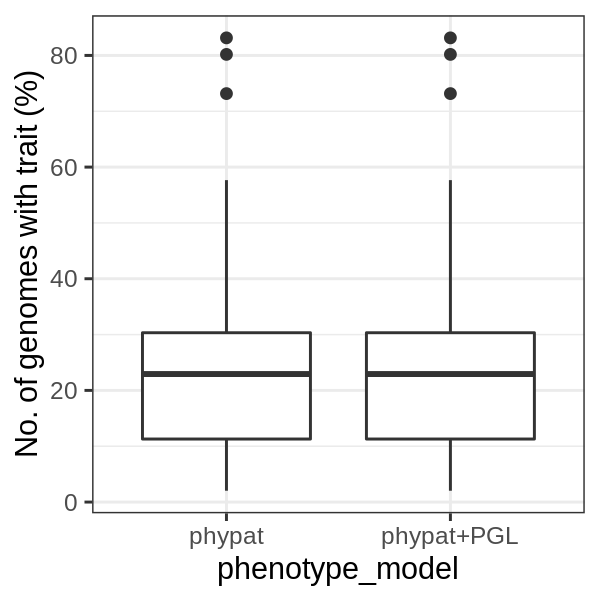

In [39]:
# plotting
p = trt_maj_votes_s %>%
    ggplot(aes(phenotype_model,perc_genomes)) +
    geom_boxplot() +
    labs(y='No. of genomes with trait (%)') +
    theme_bw()
p.dims(3,3)
Plot(p)

File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/01_data_explore/.figures/cf82f9d0375491eed78d8f8e8198532b.RDS 


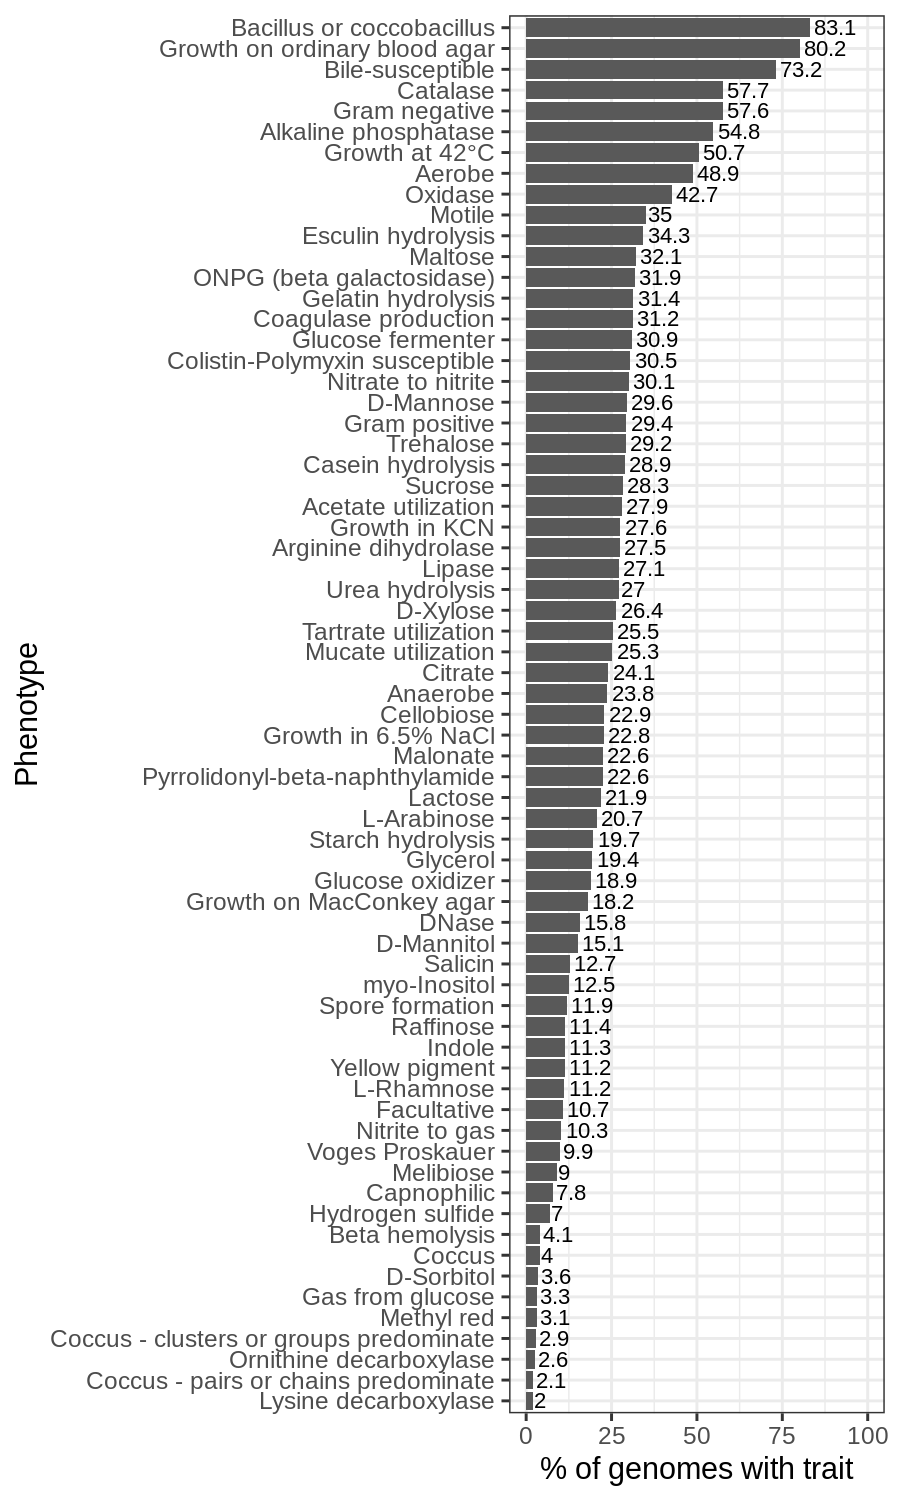

In [40]:
# plotting traits
p = trt_maj_votes_s %>%
    filter.(phenotype_model == 'phypat+PGL') %>%
    mutate.(phenotype = phenotype %>% reorder(perc_genomes)) %>%
    ggplot(aes(phenotype, perc_genomes)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(perc_genomes, 1)), hjust=-0.1, size=2.8) +
    scale_y_continuous(limits=c(0,100)) +
    labs(x='Phenotype', y='% of genomes with trait') +
    coord_flip() +
    theme_bw() 
p.dims(4.5,7.5)
Plot(p)

In [41]:
# summarizing by phylum
total_genomes = trt_maj_votes %>% pull.(sample) %>% unique %>% length

trt_maj_votes_s = trt_maj_votes %>%
    filter.(!is.na(phenotype)) %>%
    summarize.(n_genomes = sum(prediction),
               perc_genomes = sum(prediction) / total_genomes * 100,
               .by=c(phenotype, phenotype_model, Domain, Phylum)) %>%
    mutate.(total_perc_genomes = sum(perc_genomes), 
            .by = c(phenotype)) %>%
    mutate.(total_perc_genomes_phy = sum(perc_genomes), 
            .by = c(Domain, Phylum)) 
trt_maj_votes_s %>% summary_x('No. of genomes', n_genomes)
trt_maj_votes_s %>% summary_x('% of genomes', perc_genomes)
trt_maj_votes_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of genomes,0,0,0,39.65584,2,7198,2935.212,1198.295


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
% of genomes,0,0,0,0.1697596,0.008561644,30.81336,12.565,5.13


phenotype,phenotype_model,Domain,Phylum,n_genomes,perc_genomes,total_perc_genomes,total_perc_genomes_phy
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Bile-susceptible,phypat,d__Archaea,p__Aenigmarchaeota,2,0.008561644,146.3271,0.04280822
Bile-susceptible,phypat+PGL,d__Archaea,p__Aenigmarchaeota,2,0.008561644,146.3271,0.04280822
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yellow pigment,phypat,d__Bacteria,p__Zixibacteria,0,0,22.5,0.8390411
Yellow pigment,phypat+PGL,d__Bacteria,p__Zixibacteria,0,0,22.5,0.8390411


File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/01_data_explore/.figures/6f8c24bd76d1256683f66f9fd485c4da.RDS 


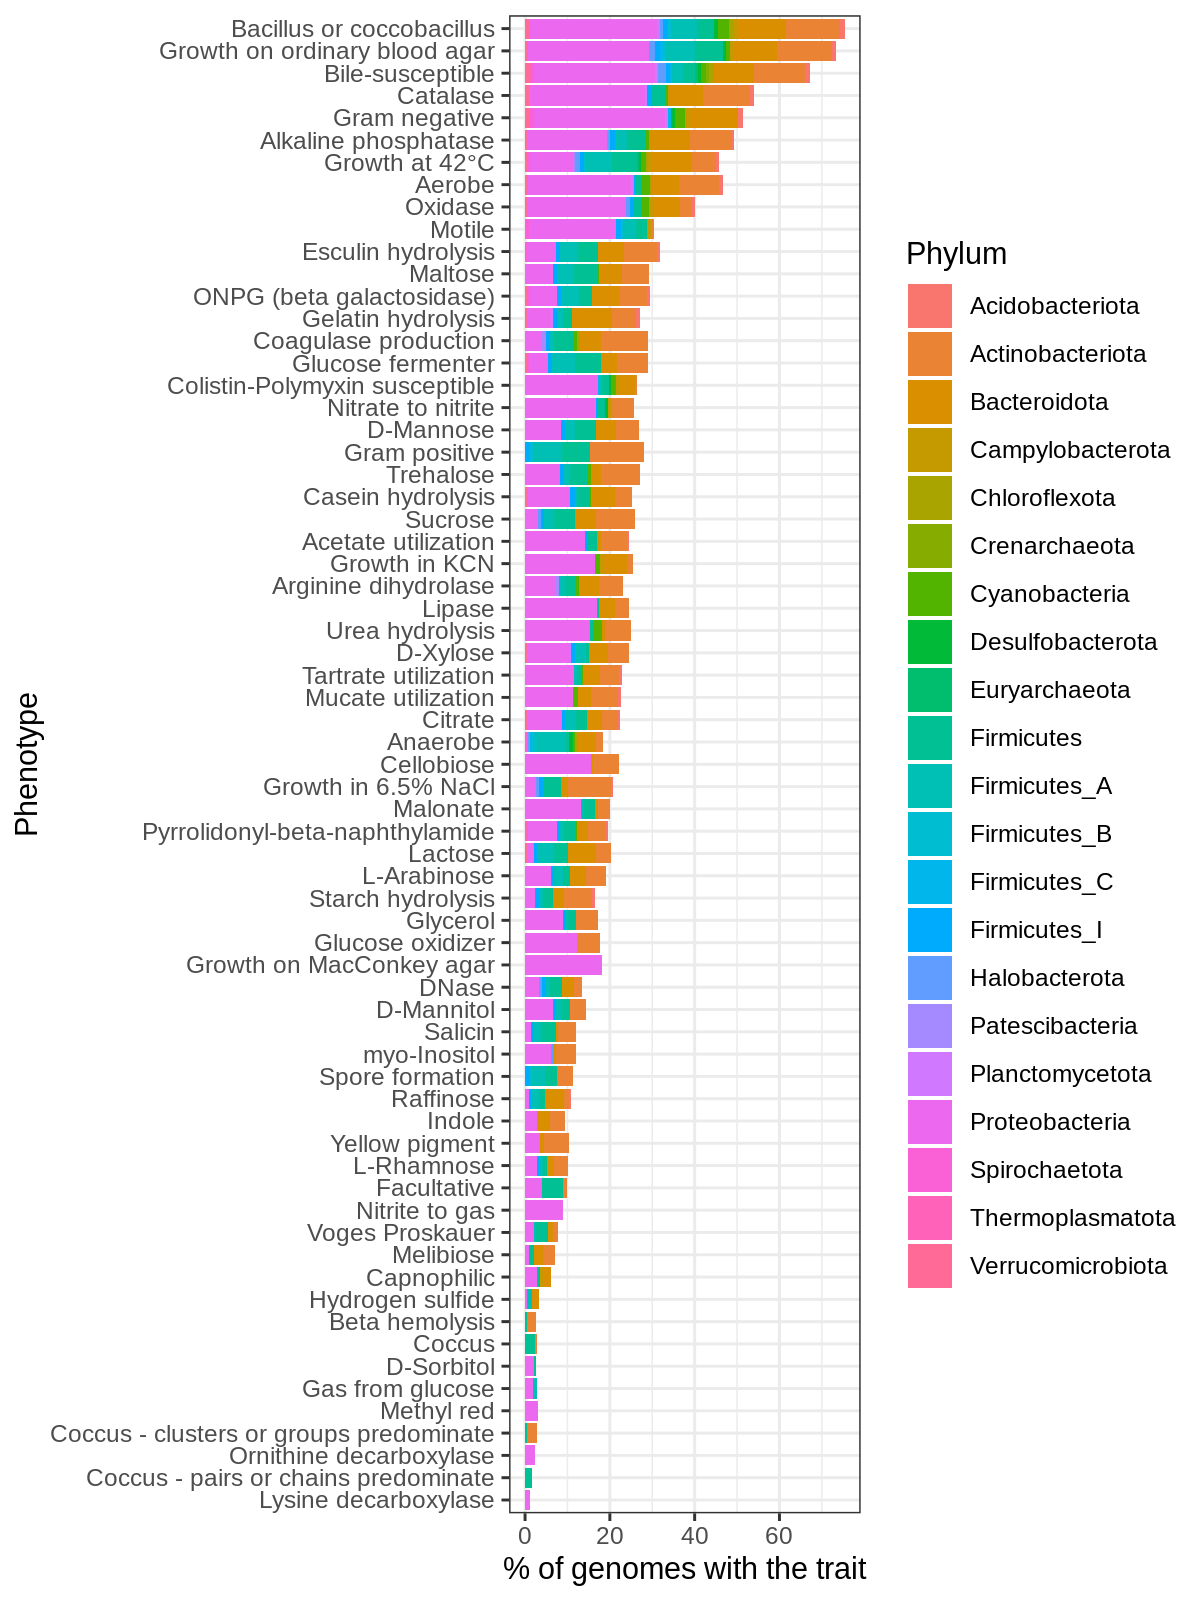

In [42]:
# plotting
p = trt_maj_votes_s %>%
    filter.(phenotype_model == 'phypat+PGL',
              n_genomes >= 100) %>%
    mutate.(Phylum = gsub('^p__', '', Phylum),
            phenotype = phenotype %>% reorder(total_perc_genomes)) %>%
    ggplot(aes(phenotype, perc_genomes, fill=Phylum)) +
    geom_bar(stat='identity') +
    labs(x='Phenotype', y='% of genomes with the trait') +
    coord_flip() +
    theme_bw() +
    guides(fill = guide_legend(ncol=1))
p.dims(6,8)
Plot(p)

File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/01_data_explore/.figures/4b6eb8e16b3b2705a9d1947b2b69f65b.RDS 


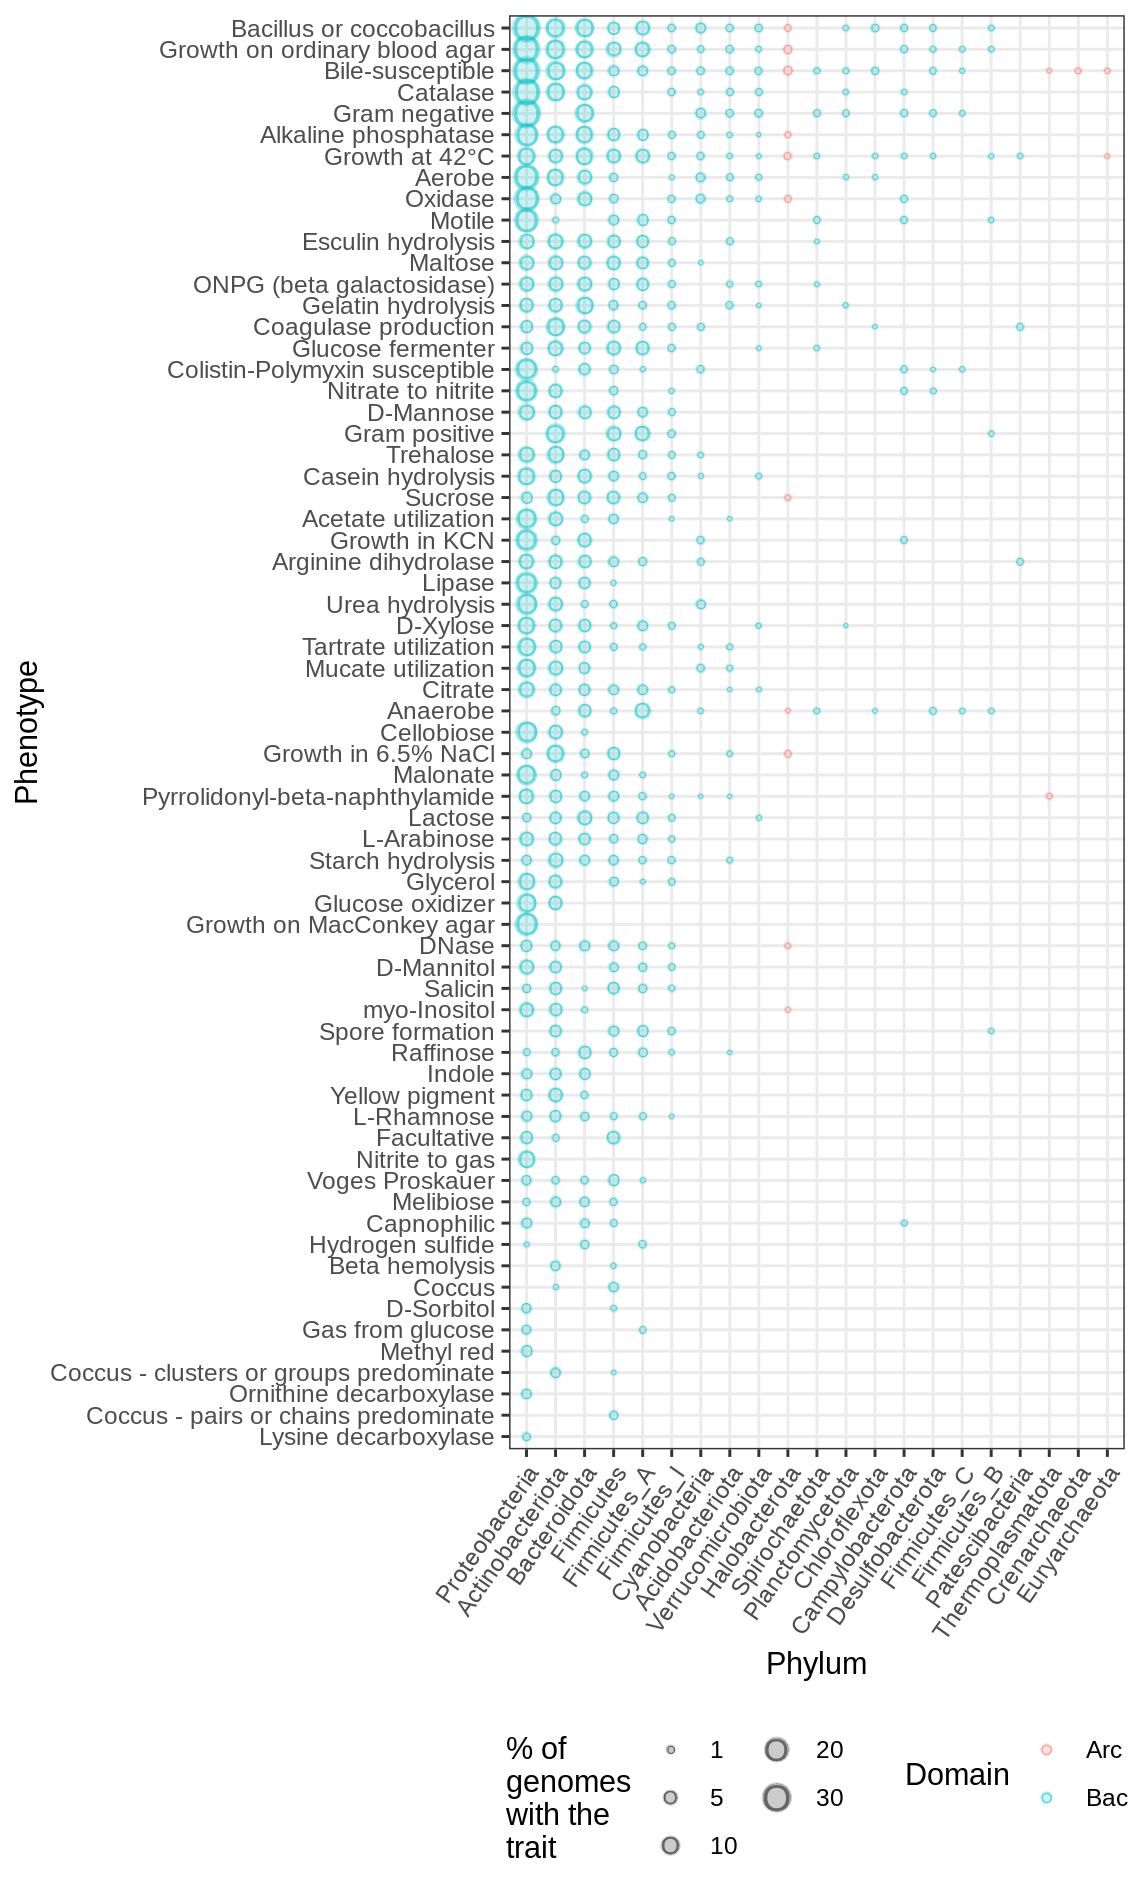

In [43]:
# plotting
p = trt_maj_votes_s %>%
    filter.(phenotype_model == 'phypat+PGL',
              n_genomes >= 100) %>%
    mutate.(Domain = gsub('^d__', '', Domain),
            Phylum = gsub('^p__', '', Phylum),
            Domain = ifelse(Domain == 'Archaea', 'Arc', 'Bac'),
            phenotype = phenotype %>% reorder(total_perc_genomes),
            Phylum = Phylum %>% reorder(-total_perc_genomes_phy)) %>%
    ggplot(aes(phenotype, Phylum, size=perc_genomes, color=Domain)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.5, shape='O') +
    scale_size_continuous('% of\ngenomes\nwith the\ntrait',
                          breaks=c(1, 5, 10, 20, 30),
                          range=c(0.5, 4.5)) +
    labs(x='Phenotype', y='Phylum') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1),
        legend.position='bottom'
    ) +
    guides(color = guide_legend(ncol=1),
           size = guide_legend(ncol=2))
p.dims(5.7,9.5)
Plot(p)

File written: /ebio/abt3_projects2/global_metagenome_diversity/ipynb/01_data_explore/.figures/b78406682c3dc68dc89aa452fc6fb284.RDS 


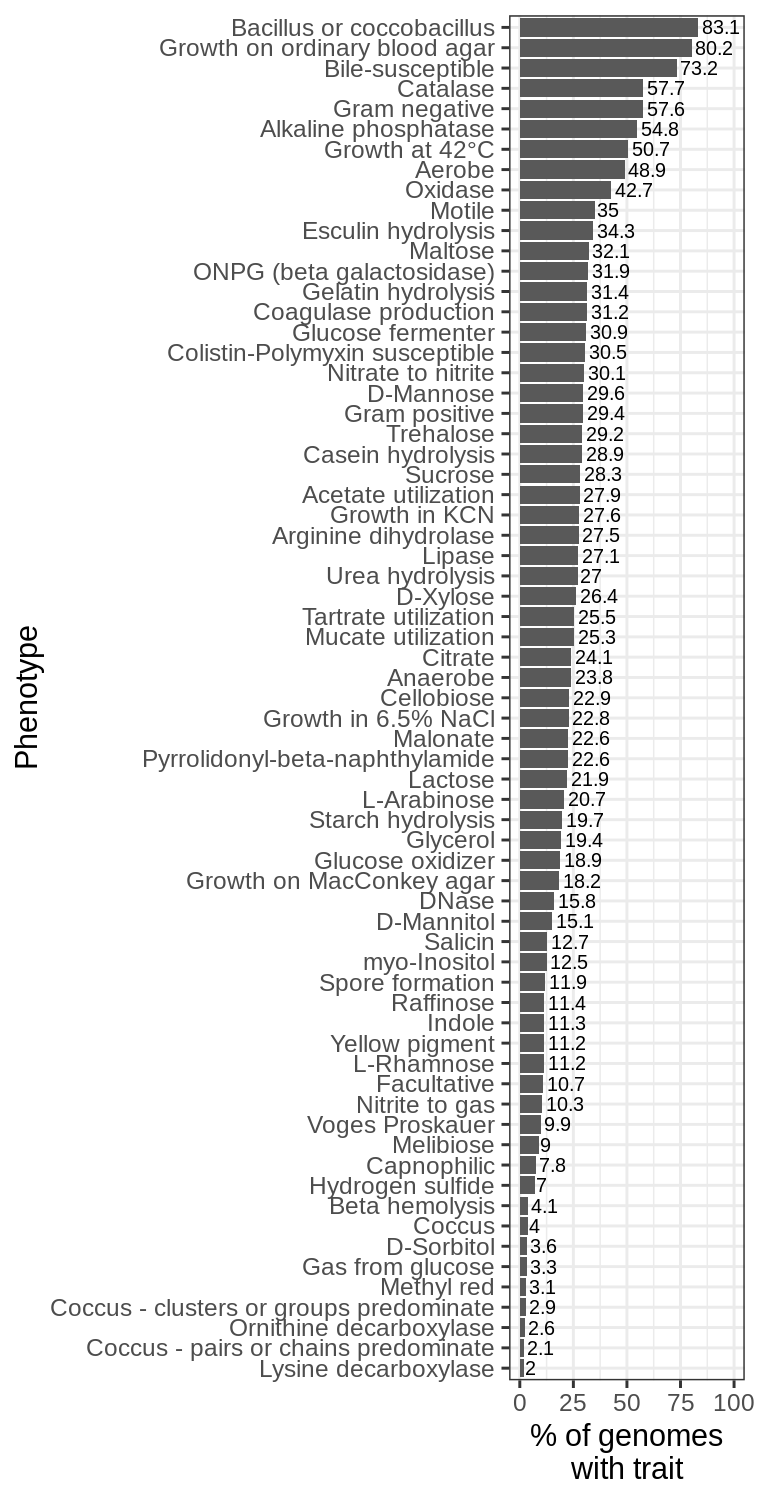

In [44]:
# for creating a side-plot on the one above 
trt_maj_votes_s = trt_maj_votes %>%
    filter.(!is.na(phenotype)) %>%
    summarize.(n_genomes = sum(prediction),
               perc_genomes = sum(prediction) / total_genomes * 100,
               .by=c(phenotype, phenotype_model)) 

p = trt_maj_votes_s %>%
    filter.(phenotype_model == 'phypat+PGL') %>%
    mutate.(phenotype = phenotype %>% reorder(perc_genomes)) %>%
    ggplot(aes(phenotype, perc_genomes)) +
    geom_bar(stat='identity') +
    geom_text(aes(label=round(perc_genomes, 1)), hjust=-0.1, size=2.5) +
    scale_y_continuous(limits=c(0,100)) +
    labs(x='Phenotype', y='% of genomes\nwith trait') +
    coord_flip() +
    theme_bw() 
p.dims(3.8,7.5)
Plot(p)

# Summary: single votes

In [20]:
F = file.path(work_dir, 'phenotype', 'predictions_flat_single-votes_combined.tsv.gz')
trt_sin_votes = Fread(F)
trt_sin_votes

sample,phenotype,prediction,phenotype_model
<chr>,<chr>,<int>,<chr>
GCA_002287175.1,Alkaline phosphatase,2,phypat
GCA_002287175.1,Beta hemolysis,3,phypat
⋮,⋮,⋮,⋮
GCA_003234965.1,Trehalose,0,phypat
GCA_003234965.1,Trehalose,0,phypat+PGL


In [21]:
# checking overlap of genome metadata & phenotype data
overlap(trt_sin_votes, meta, sample, ncbi_genbank_assembly_accession)

intersect(x,y): 23340 
setdiff(x,y): 0 
setdiff(y,x): 20 
union(x,y): 23360 


In [22]:
# joining with metadata
trt_sin_votes = trt_sin_votes %>%
    right_join.(meta %>% rename.('sample' = ncbi_genbank_assembly_accession), 
                by=c('sample')) 
trt_sin_votes

sample,phenotype,prediction,phenotype_model,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,Bacillus or coccobacillus,1,phypat,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
GCA_002789635.1,Bacillus or coccobacillus,1,phypat+PGL,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14 sp002789635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_002791595.1,Voges Proskauer,0,phypat,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595
GCA_002791595.1,Voges Proskauer,0,phypat+PGL,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8 sp002791595


In [23]:
# genomes lacking phenotypes
trt_sin_votes %>% filter.(is.na(phenotype)) %>% pull.(phenotype) %>% length

df.dims(20)
trt_sin_votes %>%
    filter.(is.na(phenotype)) %>%
    summarize.(N = n.(),
              .by=c(Domain, Phylum, Class, Order, Family, Genus)) %>%
    arrange.(Domain, Phylum, Class, Order, Family, Genus)
df.dims()

[1] 20

Domain,Phylum,Class,Order,Family,Genus,N
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Pacearchaeales,f__GW2011-AR1,g__ARS1301,1
d__Bacteria,p__AB1-6,c__AB1-6,o__AB1-6,f__AB1-6,g__AB1-6,1
d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Blattabacteriaceae,g__Sulcia,1
d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Blattabacteriaceae,g__Uzinura,1
d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,f__Cyanobiaceae,g__Prochlorococcus_B,1
d__Bacteria,p__Firmicutes,c__Bacilli,o__Mycoplasmatales,f__Mycoplasmoidaceae,g__Eperythrozoon_A,2
d__Bacteria,p__Patescibacteria,c__Gracilibacteria,o__BD1-5,f__UBA6164,g__UBA5194,1
d__Bacteria,p__Patescibacteria,c__Gracilibacteria,o__BD1-5,f__UBA6164,g__UBA6164,1
d__Bacteria,p__Patescibacteria,c__Paceibacteria,o__Paceibacterales,f__Staskawiczbacteraceae,g__01-FULL-38-12b,1


## Trait distribution

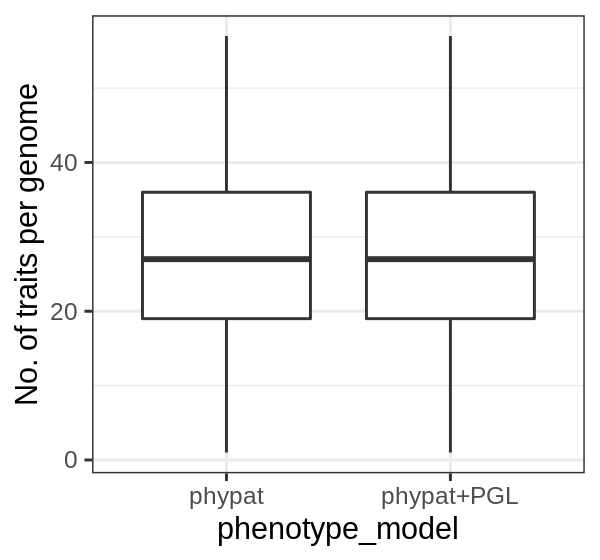

In [24]:
# plotting
trt_sin_votes_s = trt_sin_votes %>%
    filter.(!is.na(phenotype)) %>%
    summarize.(n_traits = sum(prediction > 0),
               .by=c(sample, phenotype_model)) 

p = trt_sin_votes_s %>%
    ggplot(aes(phenotype_model, n_traits)) +
    geom_boxplot() +
    labs(y='No. of traits per genome') +
    theme_bw()
p.dims(3,2.8)
plot(p)

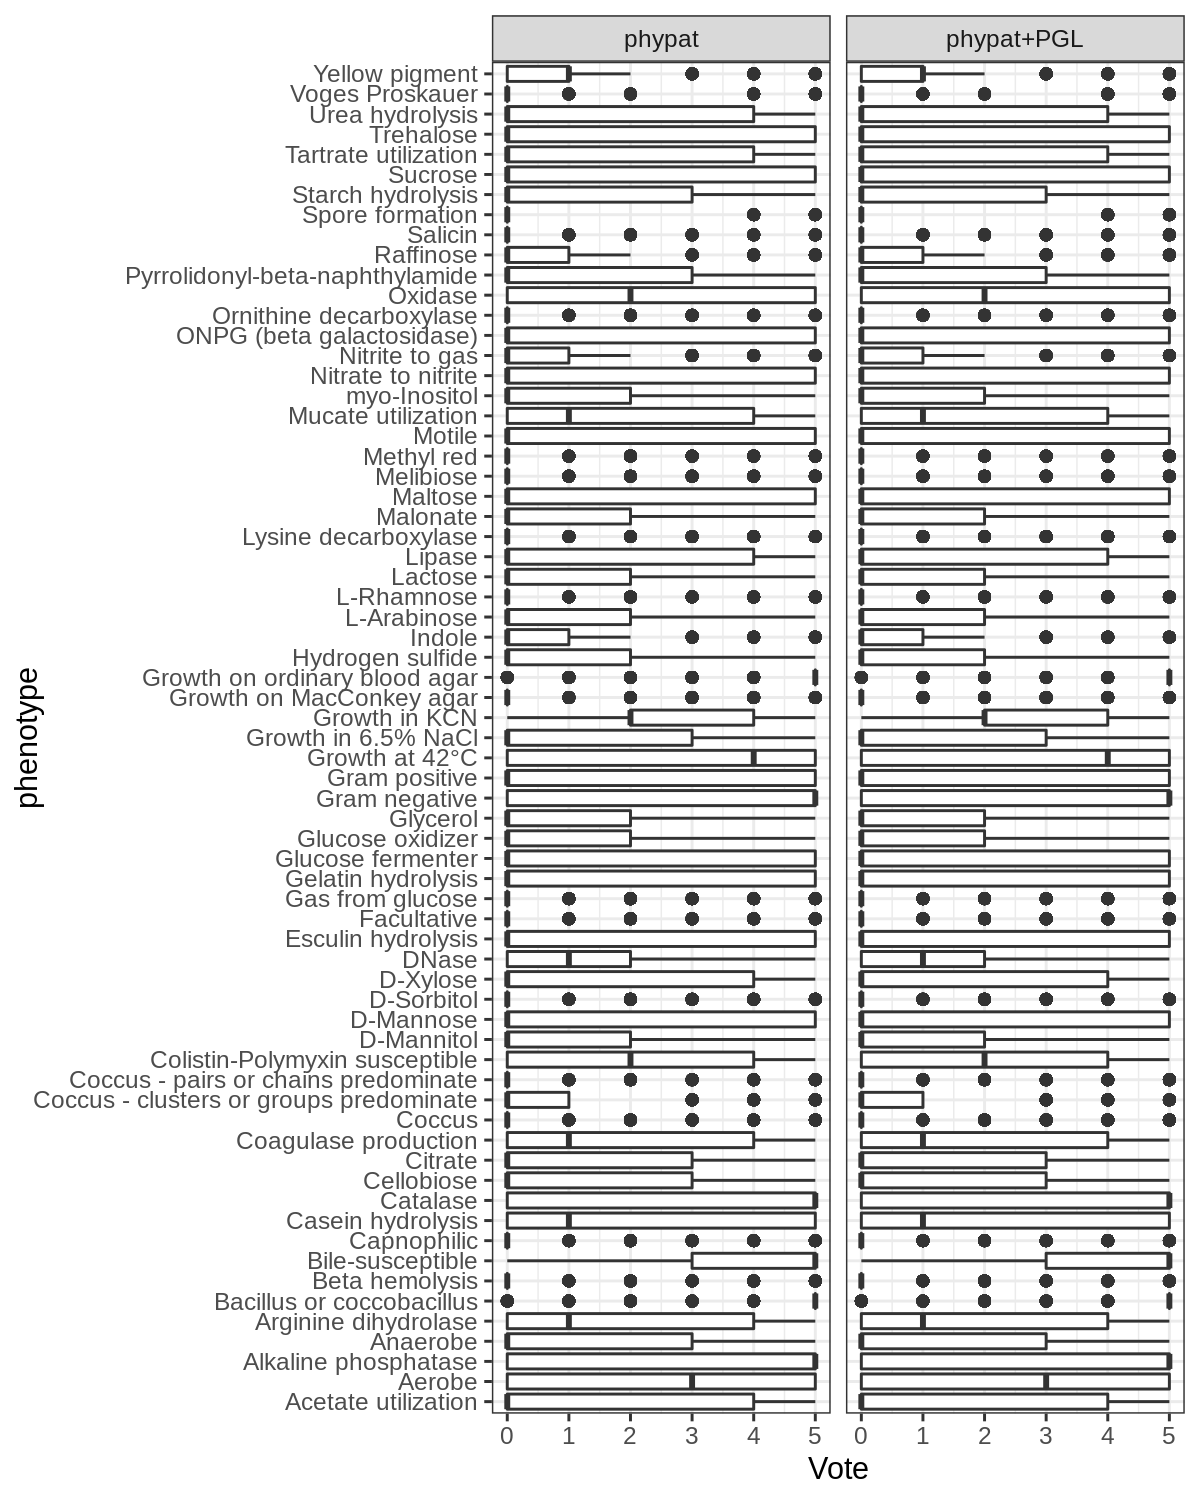

In [25]:
# phenotype vote distributions
p = trt_sin_votes %>%
    filter.(!is.na(phenotype_model)) %>%
    ggplot(aes(phenotype, prediction)) +
    geom_boxplot() +
    labs(y='Vote') +
    coord_flip() +
    facet_grid(. ~ phenotype_model) +
    theme_bw() 
p.dims(6,7.5)
plot(p)

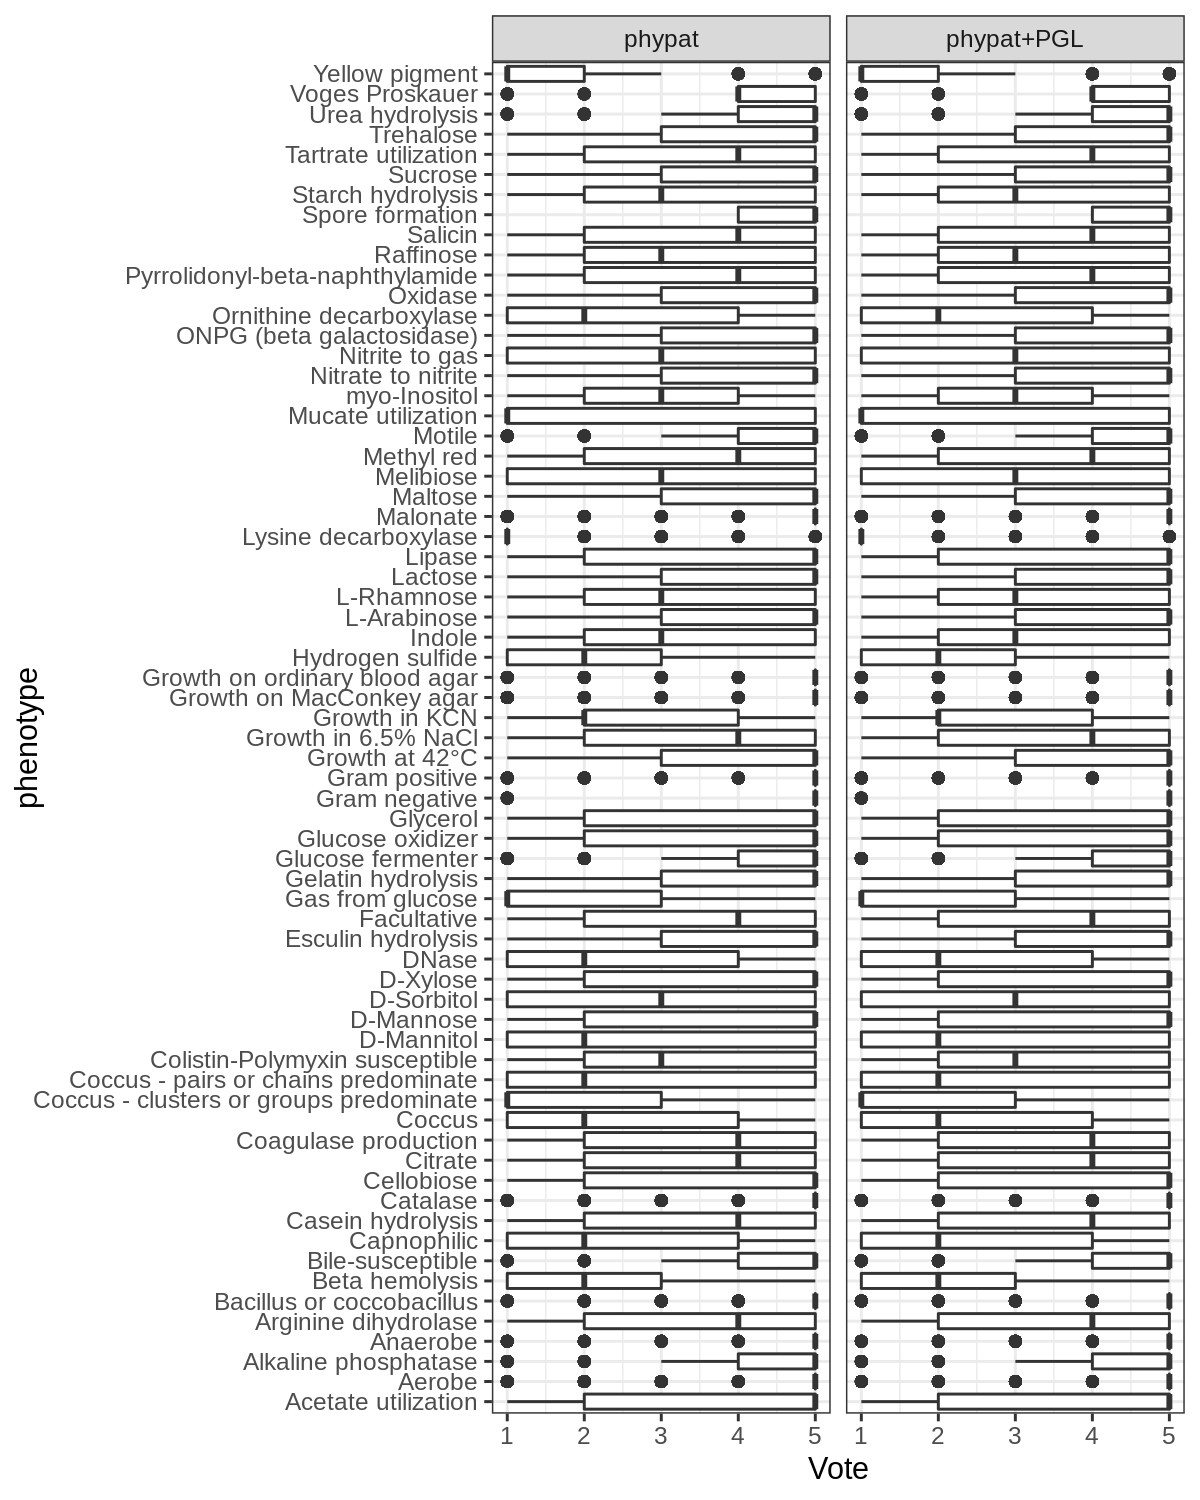

In [26]:
# phenotype vote distributions (no zeros)
p = trt_sin_votes %>%
    filter.(!is.na(phenotype_model),
            prediction > 0) %>%
    ggplot(aes(phenotype, prediction)) +
    geom_boxplot() +
    labs(y='Vote') +
    coord_flip() +
    facet_grid(. ~ phenotype_model) +
    theme_bw() 
p.dims(6,7.5)
plot(p)

# Dist of phenotypes

## Majority votes

In [27]:
trt_maj_votes %>% 
    filter.(phenotype_model == 'phypat') %>% 
    unique_n('genomes', sample)
trt_maj_votes %>% 
    filter.(phenotype_model == 'phypat+PGL') %>% 
    unique_n('genomes', sample)

No. of unique genomes: 22837 
No. of unique genomes: 22837 


In [28]:
# formatting into `genome x sample` matrix
trt_maj_votes_m = trt_maj_votes %>%
    mutate.(phenotype_model = ifelse(is.na(phenotype_model), 
                                     'phypat+PGL', phenotype_model)) %>%
    filter.(phenotype_model == 'phypat+PGL') %>%
    mutate.(phenotype = ifelse(is.na(phenotype), 'None', phenotype),
              prediction = ifelse(is.na(prediction), 1, prediction)) %>%
    select.(sample, phenotype, prediction) %>%
    as_tibble %>% 
    spread(phenotype, prediction, fill=0) %>%
    as.data.frame

rownames(trt_maj_votes_m) = trt_maj_votes_m$sample
trt_maj_votes_m$sample = NULL

trt_maj_votes_m %>% rownames %>% unique_n('genomes')
trt_maj_votes_m

No. of unique genomes: 23360 


,Acetate utilization,Aerobe,Alkaline phosphatase,Anaerobe,Arginine dihydrolase,Bacillus or coccobacillus,Beta hemolysis,Bile-susceptible,Capnophilic,Casein hydrolysis,⋯,Raffinose,Salicin,Spore formation,Starch hydrolysis,Sucrose,Tartrate utilization,Trehalose,Urea hydrolysis,Voges Proskauer,Yellow pigment
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GCA_000005825.2,1,1,1,0,0,1,0,1,0,1,⋯,0,0,1,1,1,0,1,0,0,0
GCA_000006175.2,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_900489835.1,0,1,1,0,1,1,0,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
GCA_900489925.1,1,1,1,0,1,1,0,1,0,1,⋯,0,0,0,0,0,0,1,1,0,0


In [88]:
# creating dendrogram
## WARNING: slow
trt_maj_votes_dnd = vegan::vegdist(trt_maj_votes_m, method='jaccard') %>%
    hclust(method='average') %>%
    as.phylo
trt_maj_votes_dnd


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  GCA_000005825.2, GCA_000006175.2, GCA_000006685.1, GCA_000006805.1, GCA_000006945.2, GCA_000006965.1, ...

Rooted; includes branch lengths.

In [89]:
# checking tip labels
overlap(trt_maj_votes_dnd$tip.label, 
        meta$ncbi_genbank_assembly_accession)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [90]:
# writing tree
trt_maj_votes_dnd_F = file.path(work_dir, 'phenotype', 'predictions_flat_majority-votes_combined_jaccard.nwk')
write.tree(trt_maj_votes_dnd, file=trt_maj_votes_dnd_F)
cat('File written:', trt_maj_votes_dnd_F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_majority-votes_combined_jaccard.nwk 


### Renaming

* renaming to GTDB species names

In [50]:
# checking overlap
overlap(trt_maj_votes_dnd$tip.label, 
        meta$ncbi_genbank_assembly_accession)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [51]:
# copying
trt_maj_votes_dnd_rn = trt_maj_votes_dnd

In [52]:
# re-labeling
tmp = meta %>%
    as.data.frame
rownames(tmp) = tmp$ncbi_genbank_assembly_accession

trt_maj_votes_dnd_rn$tip.label = tmp[trt_maj_votes_dnd$tip.label,]$Species
trt_maj_votes_dnd_rn


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Bacillus_S pseudofirmus, s__Methanococcus voltae, s__Chlamydia muridarum, s__Halobacterium salinarum, s__Salmonella enterica, s__Sinorhizobium meliloti_B, ...

Rooted; includes branch lengths.

In [53]:
# writing tree
trt_maj_votes_dnd_F = file.path(work_dir, 'phenotype', 'predictions_flat_majority-votes_combined_jaccard_rn.nwk')
write.tree(trt_maj_votes_dnd_rn, file=trt_maj_votes_dnd_F)
cat('File written:', trt_maj_votes_dnd_F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_majority-votes_combined_jaccard_rn.nwk 


In [54]:
# clearing memory
rm(trt_maj_votes)
rm(trt_maj_votes_m)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2325870,124.3,4789724,255.8,4789724,255.8
Vcells,77367125,590.3,901141164,6875.2,1077244598,8218.8


## Single votes

In [55]:
# formatting into `genome x sample` matrix
trt_sin_votes_m = trt_sin_votes %>%
    mutate.(phenotype_model = ifelse(is.na(phenotype_model), 
                                     'phypat+PGL', phenotype_model)) %>%
    filter.(phenotype_model == 'phypat+PGL') %>%
    mutate.(phenotype = ifelse(is.na(phenotype), 'None', phenotype),
            prediction = ifelse(is.na(prediction), 5, prediction)) %>%
    select.(sample, phenotype, prediction) %>%
    as_tibble %>%
    spread(phenotype, prediction, fill=0) %>%
    as.data.frame

rownames(trt_sin_votes_m) = trt_sin_votes_m$sample
trt_sin_votes_m$sample = NULL

trt_sin_votes_m %>% rownames %>% unique_n('genomes')
trt_sin_votes_m

No. of unique genomes: 23360 


,Acetate utilization,Aerobe,Alkaline phosphatase,Anaerobe,Arginine dihydrolase,Bacillus or coccobacillus,Beta hemolysis,Bile-susceptible,Capnophilic,Casein hydrolysis,⋯,Raffinose,Salicin,Spore formation,Starch hydrolysis,Sucrose,Tartrate utilization,Trehalose,Urea hydrolysis,Voges Proskauer,Yellow pigment
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GCA_000005825.2,5,5,5,0,2,5,0,5,0,5,⋯,0,3,5,5,5,2,5,0,1,1
GCA_000006175.2,0,0,0,2,3,1,1,5,0,2,⋯,0,0,0,0,0,0,0,2,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_900489835.1,0,5,5,0,4,5,0,4,5,5,⋯,0,0,0,1,0,1,0,0,0,2
GCA_900489925.1,5,5,5,0,4,5,1,5,0,5,⋯,0,0,0,3,3,3,4,5,0,1


In [56]:
# creating dendrogram
trt_sin_votes_dnd = vegan::vegdist(trt_sin_votes_m, method='bray') %>%
    hclust(method='average') %>%
    as.phylo
trt_sin_votes_dnd


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  GCA_000005825.2, GCA_000006175.2, GCA_000006685.1, GCA_000006805.1, GCA_000006945.2, GCA_000006965.1, ...

Rooted; includes branch lengths.

In [57]:
# checking tip labels
overlap(trt_sin_votes_dnd$tip.label, 
        meta$ncbi_genbank_assembly_accession)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [58]:
# writing tree
trt_sin_votes_dnd_F = file.path(work_dir, 'phenotype', 'predictions_flat_single-votes_combined_bray.nwk')
write.tree(trt_sin_votes_dnd, file=trt_sin_votes_dnd_F)
cat('File written:', trt_sin_votes_dnd_F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_single-votes_combined_bray.nwk 


### Renaming

In [59]:
# checking overlap
overlap(trt_sin_votes_dnd$tip.label, 
        meta$ncbi_genbank_assembly_accession)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [60]:
# copying
trt_sin_votes_dnd_rn = trt_sin_votes_dnd

In [61]:
# re-labeling
tmp = meta %>%
    as.data.frame
rownames(tmp) = tmp$ncbi_genbank_assembly_accession

trt_sin_votes_dnd_rn$tip.label = tmp[trt_sin_votes_dnd$tip.label,]$Species
trt_sin_votes_dnd_rn


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Bacillus_S pseudofirmus, s__Methanococcus voltae, s__Chlamydia muridarum, s__Halobacterium salinarum, s__Salmonella enterica, s__Sinorhizobium meliloti_B, ...

Rooted; includes branch lengths.

In [62]:
# writing tree
trt_sin_votes_dnd_F = file.path(work_dir, 'phenotype', 'predictions_flat_single-votes_combined_bray_rn.nwk')
write.tree(trt_sin_votes_dnd_rn, file=trt_sin_votes_dnd_F)
cat('File written:', trt_sin_votes_dnd_F, '\n')

File written: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG//phenotype/predictions_flat_single-votes_combined_bray_rn.nwk 


In [63]:
# clearing memory
rm(trt_sin_votes)
rm(trt_sin_votes_m)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2325882,124.3,4789724,255.8,4789724,255.8
Vcells,38412503,293.1,1074952284,8201.3,1119675296,8542.5


# sessionInfo

In [45]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.2.0 ape_5.5           tidytable_0.6.5   data.table_1.14.0
[5] ggplot2_3.3.5     tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7        pillar_1.6.2      compiler_4.1.1    R.methodsS3_1.8.1
 [5] R.utils_2.10.1   